In [1]:
## Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import collections
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import seaborn as sns

In [2]:
df=pd.read_csv("creditcard.csv\\creditcard.csv")

### Dataset Description

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

<AxesSubplot: xlabel='Class', ylabel='count'>

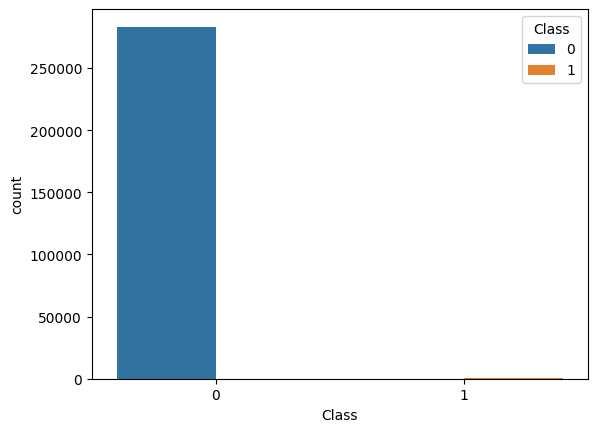

In [7]:
sns.countplot(x='Class',hue='Class',data=df)

The classes are very imbalanced near about 80% of the transactions in dataset are genuine and only 20% of them are fraud :- that is major challenge

### KMeans 

I implemented Kmeans clustering in order to classify the two classes in two different clusters the recall is very good but precision is not good 

In [8]:
x=df.iloc[:,0:30]
y=df['Class']

In [9]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [11]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=0)
kmeans.fit(x_train)

KMeans(n_clusters=2, random_state=0)

In [12]:
pred=kmeans.predict(x_test)


In [13]:
from sklearn.metrics import recall_score
print(recall_score(y_test,pred))

0.6744186046511628


In [14]:
km_recall=recall_score(y_test,pred)
km_pre=precision_score(y_test,pred)
km_acc=accuracy_score(y_test,pred)
km_cm=confusion_matrix(y_test,pred)
km_f1=f1_score(y_test,pred)

In [15]:
ndf = {'Recall':km_recall,'Precision' :km_pre, 'F1_score':km_f1,'Accuracy': km_acc}

print("Metrics report for Kmeans ")



print('\n')

for i in ndf:
    
    print(i,ndf[i])
print('\n')

cm=confusion_matrix(y_test,pred)
print('Confusion Matrix \n',cm)


Metrics report for Kmeans 


Recall 0.6744186046511628
Precision 0.0019008083897749618
F1_score 0.003790932264319484
Accuracy 0.46280457717521556


Confusion Matrix 
 [[39306 45683]
 [   42    87]]


In [16]:
# dropping time column
df.drop(['Time'],axis=1,inplace=True)

### Correlation matrix

<AxesSubplot: >

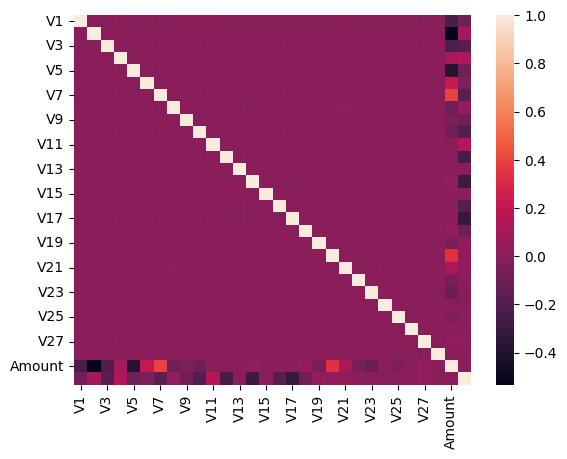

In [17]:
sns.heatmap(df.corr())

### Detecting outliers

Turkey 's method to detect outliers is used when data is highly skewed 
The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Procedure:

Find the first quartile, Q1.
Find the third quartile, Q3.
Calculate the IQR. IQR = Q3-Q1.
Define the normal data range with lower limit as Q1–1.5 IQR and upper limit as Q3+1.5 IQR.

For oulier detection methods look here: https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods


In [18]:
def IQRmethod(df,n,features):
    outlierL=[]
    for cols in features:
        Q1=np.percentile(df[cols],25)
        Q3=np.percentile(df[cols],75)
        IQR=Q3-Q1
        outlier_cols=df[(df[cols]<Q1-1.5*IQR) | (df[cols]>Q3-1.5*IQR)].index
        outlierL.extend(outlier_cols)
        outlierL=collections.Counter(outlierL)
        mul_outliers=list(k for k,v in outlierL.items() if v>n)
        outlier_step=1.5*IQR
        out1 = df[df[cols]< Q1 - outlier_step]
        out2 = df[df[cols]> Q3 + outlier_step]
    
        print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
        return outlierL

In [19]:
import numpy as np
num_cols=(list(df.loc[:,'V1':'Amount']))
outliers=IQRmethod(df,1,num_cols)
df_out=df.drop(outliers,axis=0).reset_index(drop=True)



Total number of deleted outliers is: 6948


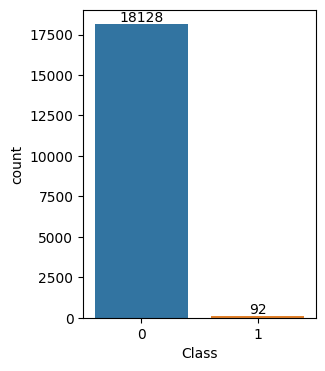

In [20]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df_out)
for i in ax.containers:
    ax.bar_label(i,)

As we can see after removing the outliers our data became more imbalanced as fraud class has only 92 rows 
So, we will drop the idea to delete outliers

###  Stratified Sampling

Stratified sampling is preferred when the data is highly imbalanced in order to split equal percentage of the classes in both train and test dataframe.

These dataset divisions are usually generated randomly according to a target variable.

In [21]:

X=df.drop('Class',axis=1)
Y=df['Class']



In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,stratify=Y,test_size=0.3,random_state=42)

### Randomforest Classifier without under/oversampling

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
kf=StratifiedKFold(n_splits=5,shuffle=False)

In [24]:
rfmodel=RandomForestClassifier(n_estimators=100,max_depth=12,random_state=13)

In [25]:
rfmodel.fit(X_train,Y_train)
y_pred=rfmodel.predict(X_test)

In [26]:
rf_recall=recall_score(Y_test,y_pred)

In [27]:
rf_pre=precision_score(Y_test,y_pred)

In [28]:
rf_cm=confusion_matrix(Y_test,y_pred)

In [29]:
rf_acc=accuracy_score(Y_test,y_pred)
rf_f1=f1_score(Y_test,y_pred)

 The Matthews Correlation Coefficient (MCC) is a machine learning measure which is used to check the
balance of the binary (two-class) classifiers. It takes into account all the true and false values of confusion matrix that is why it is generally
regarded as a balanced measure which can be used even if there are different classes.

MCC is high if the model is doing well on both the classes

In [30]:
rf_mc=matthews_corrcoef(Y_test,y_pred)

print('Matthews_corrcoef',rf_mc)

Matthews_corrcoef 0.8602850523630742


#### Optimising for Recall

Recall: The ability of model to find all the relevant cases in dataset . The number of true positive divided by true positive and false negatives.

Cases like credit card fruad detection we want to avoid false negative cases as fraud transaction costs us alot so we want to avoid them. False negative case is when fraud positive transaction is considered as genuine which is more important  as compared to  false positive means if the genuine transaction as fraud.  

In [31]:
rf = {'Recall for Random forest without under/oversampling ':rf_recall,
      'Precision for Rnadom forest without under/oversampling' :rf_pre,
      'F1_score for Random forest without under/oversampling': rf_f1,
      'Accuracy for Random forest without under/oversampling': rf_acc, 
      'Mathews correlation cofficient for Random forest without under/oversampling':rf_mc}

print("Classification report for Random Forest Classifier without under/oversampling")



print('\n')

for i in rf:
    
    print(i,'\t',rf[i])
print('\n')

cm=confusion_matrix(Y_test,y_pred)
print('Confusion Matrix \n',cm)

Classification report for Random Forest Classifier without under/oversampling


Recall for Random forest without under/oversampling  	 0.7676056338028169
Precision for Rnadom forest without under/oversampling 	 0.9646017699115044
F1_score for Random forest without under/oversampling 	 0.8549019607843137
Accuracy for Random forest without under/oversampling 	 0.9995653093352758
Mathews correlation cofficient for Random forest without under/oversampling 	 0.8602850523630742


Confusion Matrix 
 [[84972     4]
 [   33   109]]


### Smote (Synthetic Minority Oversampling Technique)

Smote synthesize elements for the minority class.It works by selecting examples that are close in the feature space,drawing lines between the examples in the feature space and draw a new sample at a point along that line.

In [32]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline,Pipeline

smote_pipeline=make_pipeline(SMOTE(random_state=42),RandomForestClassifier(n_estimators=100,random_state=13))

In [33]:
smote_rf=smote_pipeline
smote_rf.fit(X_train,Y_train)


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=13))])

In [34]:
pred=smote_rf.predict(X_test)

smote_recall=recall_score(Y_test,pred)
smote_pre=precision_score(Y_test,pred)
smote_acc=accuracy_score(Y_test,pred)
smote_cm=confusion_matrix(Y_test,pred)
smote_f1=f1_score(Y_test,pred)
smote_mc=matthews_corrcoef(Y_test,pred)

In [35]:
smote = {'Recall for Random Forest with Smote oversampling ':smote_recall,
         'Precision for Random Forest with Smote oversampling' :smote_pre,
         'F1_score for Random Forest with Smote oversampling':smote_f1,
         'Accuracy for Random Forest with Smote oversampling': smote_acc,
         'Mathew correlation cofficient for Random Forest with Smote oversampling' :smote_mc
        }

print("Classification report for Random Forest with Smote oversampling  ")



print('\n')

for i in smote:
    
    print(i,'\t',smote[i])
print('\n')

cm=confusion_matrix(Y_test,pred)
print('Confusion Matrix \n',cm)

Classification report for Random Forest with Smote oversampling  


Recall for Random Forest with Smote oversampling  	 0.7746478873239436
Precision for Random Forest with Smote oversampling 	 0.8943089430894309
F1_score for Random Forest with Smote oversampling 	 0.830188679245283
Accuracy for Random Forest with Smote oversampling 	 0.9994713221645245
Mathew correlation cofficient for Random Forest with Smote oversampling 	 0.8320733900221179


Confusion Matrix 
 [[84963    13]
 [   32   110]]


### Tomek

It starts by finding samples of data from majority class that has lowest Euclidean distance with the minority class data and then remove it .

In [36]:
from imblearn.under_sampling import TomekLinks

TomekPipeline=make_pipeline(TomekLinks(),RandomForestClassifier(n_estimators=100,random_state=13))

In [37]:
Tomek_rfmodel=TomekPipeline
Tomek_rfmodel.fit(X_train,Y_train)

Pipeline(steps=[('tomeklinks', TomekLinks()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=13))])

In [38]:
pred=Tomek_rfmodel.predict(X_test)

tomek_recall=recall_score(Y_test,pred)
tomek_pre=precision_score(Y_test,pred)
tomek_acc=accuracy_score(Y_test,pred)
tomek_cm=confusion_matrix(Y_test,pred)
tomek_f1=f1_score(Y_test,pred)
tomek_mc=matthews_corrcoef(Y_test,pred)

In [39]:
tomek = {'Recall for Random Forest with Tomek undersampling':tomek_recall,'Precision for Random Forest with Tomek undersampling' :tomek_pre, 'F1_score for Random Forest with Tomek undersampling':tomek_f1,'Accuracy for Random Forest with Tomek undersampling': tomek_acc,'Mathew correlation cofficient for Random Forest with Tomek undersampling' :tomek_mc
        }

print("Classification report for Random Forest with Tomek undersampling  ")



print('\n')

for i in tomek:
    
    print(i,'\t',tomek[i])
print('\n')

cm=confusion_matrix(Y_test,pred)
print('Confusion Matrix \n',cm)

Classification report for Random Forest with Tomek undersampling  


Recall for Random Forest with Tomek undersampling 	 0.7676056338028169
Precision for Random Forest with Tomek undersampling 	 0.956140350877193
F1_score for Random Forest with Tomek undersampling 	 0.8515625
Accuracy for Random Forest with Tomek undersampling 	 0.9995535609389319
Mathew correlation cofficient for Random Forest with Tomek undersampling 	 0.8564954675137644


Confusion Matrix 
 [[84971     5]
 [   33   109]]


### Smote + Tomek 

A combination of over-sampling the minority class and under-sampling the majority class may gives better classifier performance.

First smote is implemented to create new synthetic minority class samples to get balanced data. Then Tomek links is used to remove the samples close to the boundary of the two classes to increase the separation between two classes.

In [40]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline,make_pipeline

In [41]:
SmoteTomekPipeline=make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),RandomForestClassifier(n_estimators=50,max_depth=6,random_state=13))

In [42]:
SmoteTomek_rfmodel=SmoteTomekPipeline

In [43]:
SmoteTomek_rfmodel.fit(X_train,Y_train)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=6, n_estimators=50,
                                        random_state=13))])

In [44]:
SmoteTomekmodel=SmoteTomek_rfmodel

In [45]:
Ypred=SmoteTomek_rfmodel.predict(X_test)

In [46]:

smoteTomek_recall=recall_score(Y_test,Ypred)
smoteTomek_pre=precision_score(Y_test,Ypred)
smoteTomek_acc=accuracy_score(Y_test,Ypred)
smoteTomek_cm=confusion_matrix(Y_test,Ypred)
smoteTomek_f1=f1_score(Y_test,Ypred)
smoteTomek_mc=matthews_corrcoef(Y_test,Ypred)

In [47]:
smote_tomek = {'Recall for Random Forest Classifier with combination of smote and tomek':smoteTomek_recall,'Precision for Random Forest Classifier with combination of smote and tomek' :smoteTomek_pre, 'F1_score for Random Forest Classifier with combination of smote and tomek': smoteTomek_f1,'Accuracy for Random Forest Classifier with combination of smote and tomek': smoteTomek_acc
                     , 'Mathews Correlation Cofficient for Random Forest Classifier with combination of smote and tomek':smoteTomek_mc}
smote_tomek1 = {'Recall ':smoteTomek_recall,'Precision ' :smoteTomek_pre, 'F1_score ': smoteTomek_f1,'Accuracy ': smoteTomek_acc
                     , 'Mathews Correlation Cofficient ':smoteTomek_mc}
print("Metrics report for Random Forest Classifier with combination of smote and tomek")



print('\n')

for i in smote_tomek:
    
    print(i,'\t',smote_tomek[i])
print('\n')

cm=confusion_matrix(Y_test,Ypred)
print('Confusion Matrix \n',cm)

Metrics report for Random Forest Classifier with combination of smote and tomek


Recall for Random Forest Classifier with combination of smote and tomek 	 0.8661971830985915
Precision for Random Forest Classifier with combination of smote and tomek 	 0.28805620608899296
F1_score for Random Forest Classifier with combination of smote and tomek 	 0.4323374340949033
Accuracy for Random Forest Classifier with combination of smote and tomek 	 0.9962052679809206
Mathews Correlation Cofficient for Random Forest Classifier with combination of smote and tomek 	 0.4982864982895779


Confusion Matrix 
 [[84672   304]
 [   19   123]]


### Balanced Bagging Classifier

Bagging method works by building multiple estimators on different randomly selected subset of a data.

Here, our data is imbalanced so we are using balanced bagging classifier .It allows resampling of each subset before training each estimator of the ensemble.

In [48]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
bbc=BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),sampling_strategy='auto',replacement=False,random_state=0)
bbc.fit(X_train,Y_train)
pred_bbc=bbc.predict(X_test)

C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\ensemble\_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


In [50]:
bbc_recall=recall_score(Y_test,pred_bbc)
bbc_pre=precision_score(Y_test,pred_bbc)
bbc_acc=accuracy_score(Y_test,pred_bbc)
bbc_cm=confusion_matrix(Y_test,pred_bbc)
bbc_f1=f1_score(Y_test,pred_bbc)
bbc_mc=matthews_corrcoef(Y_test,pred_bbc)

In [51]:
bbc = {'Recall for Balanced Bagging Classifier':bbc_recall,'Precision for Balanced Bagging Classifier' :bbc_pre, 'F1_score for Balanced Bagging Classifier': bbc_f1,'Accuracy for Balanced Bagging Classifier': bbc_acc
      , 'Mathews Correlation cofficient for Balanced Bagging Classifier':bbc_mc}
bbc1 = {'Recall ':bbc_recall,'Precision ' :bbc_pre, 'F1_score ': bbc_f1,'Accuracy ': bbc_acc
      , 'Mathews Correlation cofficient ':bbc_mc}

print("Classification report for Balanced Bagging Classifier ")



print('\n')

for i in bbc :
    
    print(i,'\t\t',bbc[i])
print('\n')

cm=confusion_matrix(Y_test,pred_bbc)
print('Confusion Matrix \n',cm)

Classification report for Balanced Bagging Classifier 


Recall for Balanced Bagging Classifier 		 0.8802816901408451
Precision for Balanced Bagging Classifier 		 0.05321413367390379
F1_score for Balanced Bagging Classifier 		 0.10036130068245684
Accuracy for Balanced Bagging Classifier 		 0.9736718437933222
Mathews Correlation cofficient for Balanced Bagging Classifier 		 0.21277987637201548


Confusion Matrix 
 [[82752  2224]
 [   17   125]]


### Comparison of all models

{'RF without over/undersampling': 0.7676056338028169, 'RF with smote': 0.7746478873239436, 'RF with Tomek': 0.7676056338028169, 'RF with smote+tomek': 0.8661971830985915, 'Balanced bagging classifier': 0.8802816901408451}


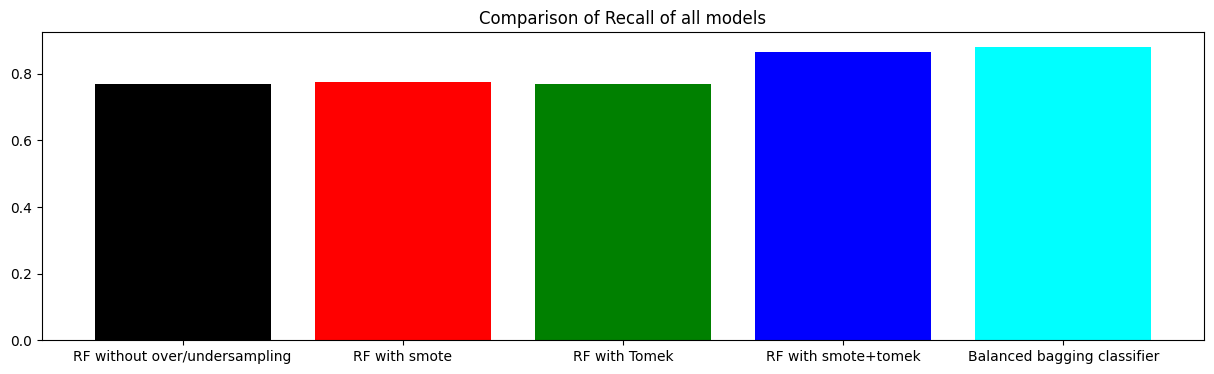

In [61]:
models={'RF without over/undersampling':list(rf.items())[0][1],'RF with smote':list(smote.items())[0][1],'RF with Tomek':list(tomek.items())[0][1],'RF with smote+tomek':list(smote_tomek.items())[0][1],'Balanced bagging classifier':list(bbc.items())[0][1]}
m=sorted(models)
names=list(models.keys())
values=list(models.values())

plt.rcParams["figure.figsize"]=(15,4)
plt.title('Comparison of Recall of all models')
plt.bar(range(len(models)),values,tick_label=names,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()



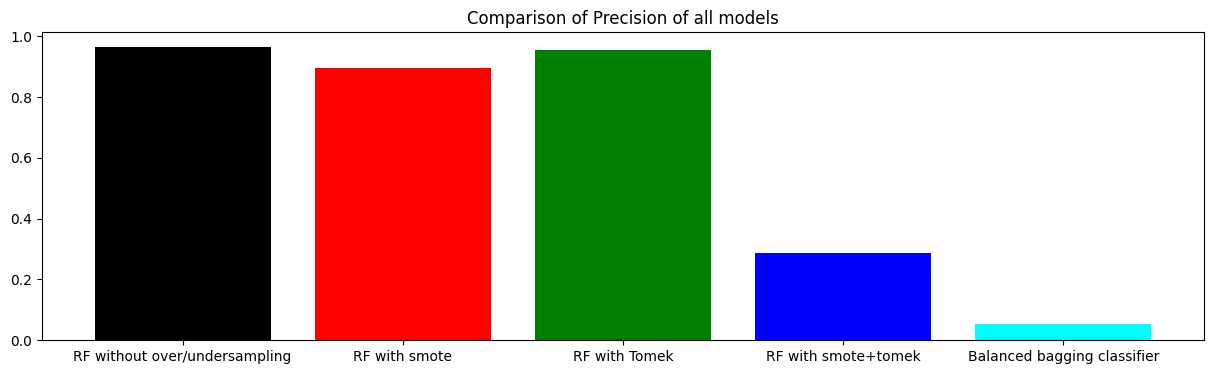

In [66]:
models={'RF without over/undersampling':list(rf.items())[1][1],'RF with smote':list(smote.items())[1][1],'RF with Tomek':list(tomek.items())[1][1],'RF with smote+tomek':list(smote_tomek.items())[1][1],'Balanced bagging classifier':list(bbc.items())[1][1]}
m=sorted(models)
names=list(models.keys())
values=list(models.values())

plt.rcParams["figure.figsize"]=(15,4)
plt.title('Comparison of Precision of all models')
plt.bar(range(len(models)),values,tick_label=names,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()



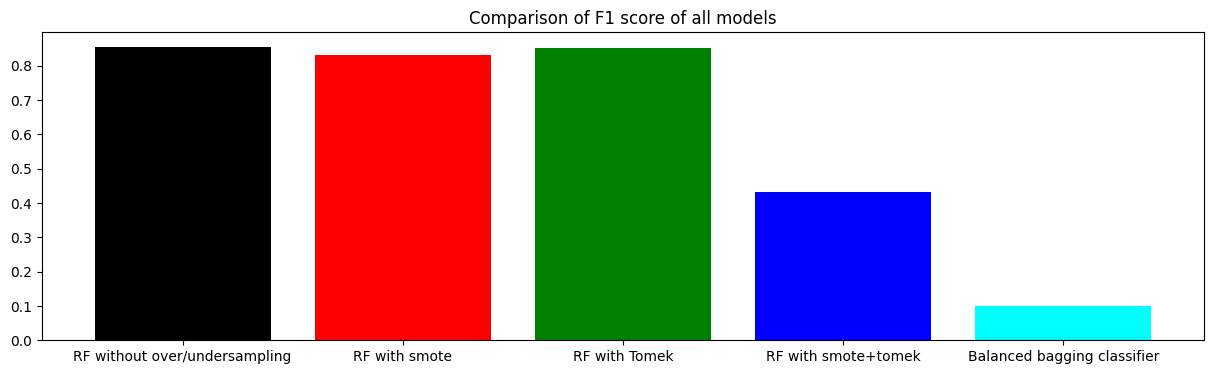

In [74]:
models={'RF without over/undersampling':list(rf.items())[2][1],'RF with smote':list(smote.items())[2][1],'RF with Tomek':list(tomek.items())[2][1],'RF with smote+tomek':list(smote_tomek.items())[2][1],'Balanced bagging classifier':list(bbc.items())[2][1]}
m=sorted(models)
names=list(models.keys())
values=list(models.values())
#print(models)
plt.rcParams["figure.figsize"]=(15,4)
plt.title('Comparison of F1 score of all models')
plt.bar(range(len(models)),values,tick_label=names,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()


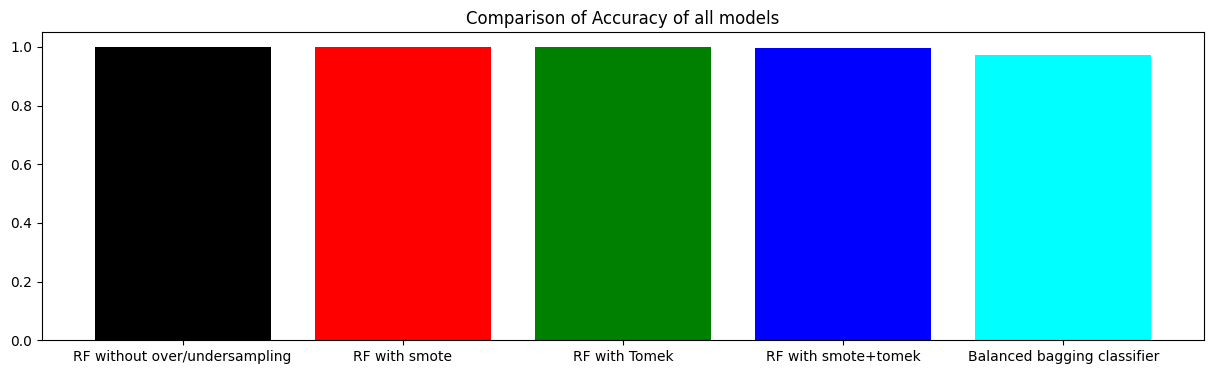

In [76]:
models={'RF without over/undersampling':list(rf.items())[3][1],'RF with smote':list(smote.items())[3][1],'RF with Tomek':list(tomek.items())[3][1],'RF with smote+tomek':list(smote_tomek.items())[3][1],'Balanced bagging classifier':list(bbc.items())[3][1]}
m=sorted(models)
names=list(models.keys())
values=list(models.values())
#print(models)
plt.rcParams["figure.figsize"]=(15,4)
plt.title('Comparison of Accuracy of all models')
plt.bar(range(len(models)),values,tick_label=names,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

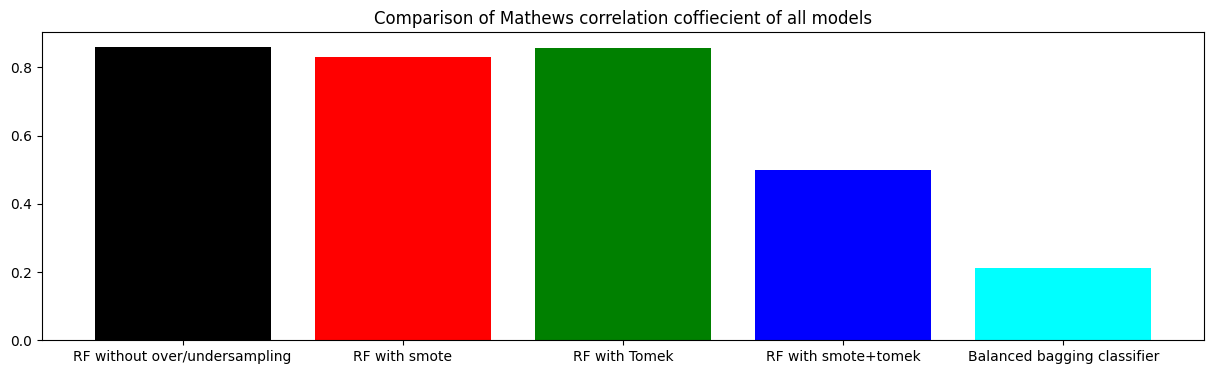

In [79]:
models={'RF without over/undersampling':list(rf.items())[4][1],'RF with smote':list(smote.items())[4][1],'RF with Tomek':list(tomek.items())[4][1],'RF with smote+tomek':list(smote_tomek.items())[4][1],'Balanced bagging classifier':list(bbc.items())[4][1]}
m=sorted(models)
names=list(models.keys())
values=list(models.values())

plt.rcParams["figure.figsize"]=(15,4)
plt.title('Comparison of Mathews correlation coffiecient of all models')
plt.bar(range(len(models)),values,tick_label=names,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

### Summary
Random Forest with both Smote and Tomek model , Bagging Bossting classifier achieved the best recall, but Precision is very less and F1 score is also not good

Both the random forest without under/oversampling and random forest with Tomek undersampling achieved 0.76% recall score.

Random Forest with Smote oversampling also achieved  0.75 recall score and precision is also quite good

### AUC-ROC Curve
AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve.

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability.

1. When AUC is 0.7, it means there is a 70% chance that the model will be able to distinguish between positive class and negative class.
2. When AUC is approximately 0.5, the model has no discrimination capacity to distinguish between positive class and negative class.
3. When AUC is approximately 0, the model is predicting a negative class as a positive class and vice versa.

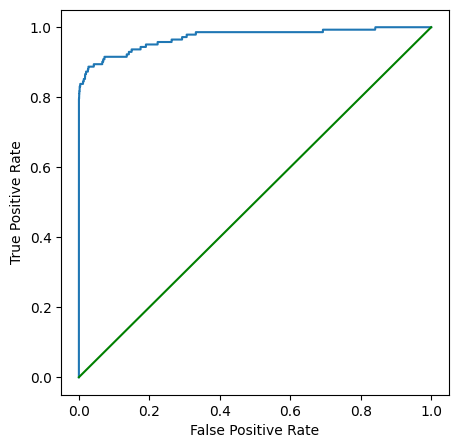

In [80]:
y_proba = rfmodel.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(Y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
#plot_sklearn_roc_curve(y_test, y_pred)